# UMAP of Microbial Datasets in Building Materials

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

'''May require command line installation of umap package by running the following line:
    conda install umap-learn'''
import umap

%matplotlib inline

If either the metadata file or feature table come in a txt data format, you may use the following code to transfer the information to a CSV

## UMAP analysis of 16S OTU dataset

Cannot have header in CSV or TSV file, will mess up the conversion to OTU table

CONVERT FROM BIOM: https://biom-format.org/documentation/biom_conversion.html

In [93]:
from sklearn import preprocessing

# Formatting CLR transformed data file
file_loc1 = "2020-07-28_clorox_16S_OTU_genus_clr_Tabl_zcomp.csv"
OTU_table = pd.read_csv(file_loc1)
OTU_table = OTU_table.set_index("Unnamed: 0")

# Might have to coerce column names to be of type float
OTU_table = OTU_table.T
OTU_table.index

Index(['1.1.By', '1.1.Bz', '1.1.pa', '1.2.Bx', '1.2.Bz', '1.2.pa', '1.3.Bx',
       '1.3.By', '1.3.Bz', '1.3.pa',
       ...
       '15.3.Bz', '13.1.By', '19.3.pa', '25.1.By', '33.2.PA', '3.2.Bz',
       '22.2.By', '26.2.Bx', '20.2.By', '18.3.pa'],
      dtype='object', length=286)

In [94]:
# Mapping table w/ features of interest 
file_loc2 = "2020-07-28_clorox_mappingfile.csv"

OTU_map_table = pd.read_csv(file_loc2)
OTU_map_table = OTU_map_table.set_index("Unnamed: 0")
OTU_map_table.index

Index(['1.1.Bx', '1.1.By', '1.1.Bz', '1.1.Pa', '1.2.Bx', '1.2.Bz', '1.2.Pa',
       '1.3.Bx', '1.3.By', '1.3.Bz',
       ...
       '8.3.Bx', '8.3.By', '8.3.Bz', '8.3.Pa', '9.1.Bz', '9.1.Pa', '9.2.Bx',
       '9.2.By', '9.2.Bz', '9.2.Pa'],
      dtype='object', name='Unnamed: 0', length=289)

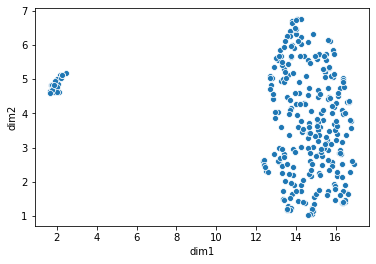

In [88]:
reducer = umap.UMAP(n_components = 2, n_neighbors = 20, metric = 'euclidean', random_state = 0, min_dist = 0.1)
embeddings = reducer.fit_transform(OTU_table)
plot_samples = pd.DataFrame(data = embeddings, columns = ['dim1', 'dim2'], index = OTU_table.index)

# Unlabeled UMAP
sns.scatterplot(x = 'dim1', y = 'dim2', data = plot_samples)

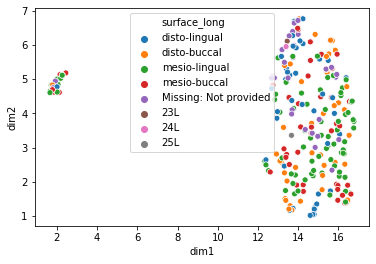

In [89]:
plot_samples = pd.concat([plot_samples, OTU_map_table['surface_long']], axis = 1, sort=False)

# Labeled UMAP
sns.scatterplot(x = 'dim1', y = 'dim2', hue = 'surface_long', data = plot_samples)

## UMAP analysis of metabolite dataset

In [95]:
# Formatting CLR transformed data file
file_loc3 = "2020-07-23_clorox_metab_clr_table_zcomp.csv"
metab_table = pd.read_csv(file_loc3)

metab_table = metab_table.set_index("Unnamed: 0")
metab_table = metab_table.T
metab_table.index

Index(['4.1pa', '3.3Bz', '1.3Bx', '1.3By', '4.1Bx', '3.3Bx', '1.3Bz', '3.3By',
       '4.1By', '4.1Bz',
       ...
       '26.2pa', '27.1Bz', '26.2By', '25.1By', '25.2pa', '27.1pa', '27.2Bx',
       '27.2Bz', '27.2pa', '25.1pa'],
      dtype='object', length=215)

In [96]:
# Mapping table w/ features of interest
file_loc4 = "2020-07-28_clorox_mappingfile.csv"

metab_map_table = pd.read_csv(file_loc4)
metab_map_table = metab_map_table.set_index("Unnamed: 0")
metab_map_table.index

Index(['1.1.Bx', '1.1.By', '1.1.Bz', '1.1.Pa', '1.2.Bx', '1.2.Bz', '1.2.Pa',
       '1.3.Bx', '1.3.By', '1.3.Bz',
       ...
       '8.3.Bx', '8.3.By', '8.3.Bz', '8.3.Pa', '9.1.Bz', '9.1.Pa', '9.2.Bx',
       '9.2.By', '9.2.Bz', '9.2.Pa'],
      dtype='object', name='Unnamed: 0', length=289)

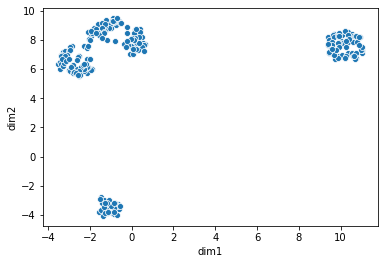

In [103]:
'''
Most important parameters:
    1) Metric - options listed in scipy.spatial.distance.pdist, which includes 'euclidean', 'jaccard', and 'braycurtis'
        Most promising results seemed to be with the braycurtis metric
    2) n_neighbors - number of approximate nearest neighbors used to construct the initial high-dimensional graph
        Low values prioritize local structure, high values prioritize global structure
        n_neighbors of 15 is the default
    3) min_dist - minimum distance between points in low-dimensional space
        Low values lead to more tightly packed embeddings
        min_dist of 0.1 is the default
'''

reducer = umap.UMAP(n_components = 2, n_neighbors = 15, metric = 'euclidean', random_state = 0, min_dist = 0.1)
embeddings = reducer.fit_transform(metab_table)
plot_samples = pd.DataFrame(data = embeddings, columns = ['dim1', 'dim2'], index = metab_table.index)

# Unlabeled UMAP
sns.scatterplot(x = 'dim1', y = 'dim2', data = plot_samples)

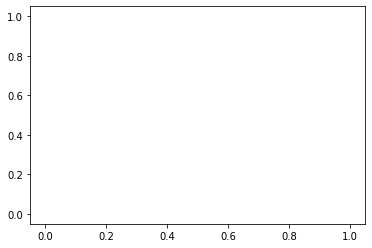

In [104]:
plot_samples = pd.concat([plot_samples, metab_map_table['center_name']], axis = 1, sort=False)

# Labeled UMAP
sns.scatterplot(x = 'dim1', y = 'dim2', hue = 'center_name', data = plot_samples)

## UMAP analysis of cytokine dataset

In [114]:
# Formatting CLR transformed data file
file_loc5 = "2020-07-12_cyto_clr_table_zcomp.csv"
cyto_table = pd.read_csv(file_loc5)

cyto_table = cyto_table.set_index("Unnamed: 0")
cyto_table = cyto_table.T

cyto_table

Unnamed: 0,[CRP] mg/L,[cTnI] pg/mL,[TNFα] pg/mL,[IL-10] pg/mL,[IL-6] pg/mL,[IFNɣ] pg/mL,[IL-1β] pg/mL,IL6/IL10
001A,-0.504648,0.046529,0.312797,0.446328,0.917752,-0.534501,-1.728423,1.044165
001B,-0.152774,-0.586410,0.678523,0.214950,0.855454,-0.676023,-1.433708,1.099989
006A,0.341824,-0.122482,1.335076,1.149575,-0.243110,-0.505474,-1.267614,-0.687795
006B,0.933126,1.237615,0.771604,0.376050,-0.519743,-1.064970,-0.693406,-1.040277
007A,-0.094628,0.551999,1.104789,0.866115,-0.072155,-0.659942,-1.480922,-0.215256
...,...,...,...,...,...,...,...,...
087B,0.335637,-0.308239,1.053723,0.097226,0.502691,-0.475293,-1.956898,0.751153
088A,0.710779,0.552089,1.245236,0.506478,-0.314502,-0.654009,-1.326103,-0.719967
089A,0.110936,0.884741,0.910243,0.180462,0.319575,-0.606504,-1.827006,0.027554
089B,0.267627,1.638996,1.264985,0.149844,-0.333583,-0.478765,-1.998591,-0.510514


In [117]:
# Mapping table w/ features of interest
file_loc6 = "all76narch_map.txt.csv"

cyto_map_table = pd.read_csv(file_loc6)
cyto_map_table = cyto_map_table.set_index("SampleID")
cyto_map_table

,BarcodeSequence,LinkerPrimerSequence,Source,PocketClass,PerioTreatment,AvgPocketDepth,PocketCategory,OverallResponse,SpecificResponse,Sex,...,PocketReClass,PDsum,Deep3,SNP1,ACh1,SNP5,ACh5,SNP10,ACh10,Description
SampleID,,,,,,,,,,,,,,,,,,,,,
001A,CTGTTCGTAGAG,CATGCTGCCTCCCGTAGGAGT,NARCH,Severe Disease,Pre,2.7,2,Same,Improved,Female,...,Moderate Disease,141,34,3721,6304,19798,23095,36331,30621,NARCH_sample_001A
001B,CTTAGCACATCA,CATGCTGCCTCCCGTAGGAGT,NARCH,Moderate Disease,Post,2.7,2,Same,Improved,NaN,...,Moderate Disease,52,13,7330,2629,40982,10137,83242,15122,NARCH_sample_001B
006A,CTTGATGCGTAT,CATGCTGCCTCCCGTAGGAGT,NARCH,Moderate Disease,Pre,2.5,2,Improved,Improved,Female,...,Moderate Disease,16,4,3955,4337,30677,12310,63300,18899,NARCH_sample_006A
006B,CTTGTGTCGATA,CATGCTGCCTCCCGTAGGAGT,NARCH,Moderate Disease,Post,2.4,2,Improved,Improved,NaN,...,Moderate Disease,12,3,3360,8651,27215,28173,71381,42258,NARCH_sample_006B
007A,GACGAGTCAGTC,CATGCTGCCTCCCGTAGGAGT,NARCH,Normal,Pre,2.4,2,Same,Same,Female,...,Normal Disease,0,0,10454,15014,57777,72016,108300,121811,NARCH_sample_007A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
065A,GAAGTCTCGCAT,CATGCTGCCTCCCGTAGGAGT,NARCH,Moderate Disease,Pre,2.4,2,Worsened,Improved,Female,...,Moderate Disease,36,9,3027,6043,13025,22859,19303,35456,NARCH_sample_065A
065B,GAATGATGAGTG,CATGCTGCCTCCCGTAGGAGT,NARCH,Moderate Disease,Post,2.7,2,Worsened,Improved,NaN,...,Moderate Disease,108,27,1515,5079,9286,22383,15468,37021,NARCH_sample_065B
068A,GACAGGAGATAG,CATGCTGCCTCCCGTAGGAGT,NARCH,Severe Disease,Pre,2.2,2,Worsened,Worsened,Male,...,Severe Disease,26,6,4033,8568,20392,42232,36234,73272,NARCH_sample_068A


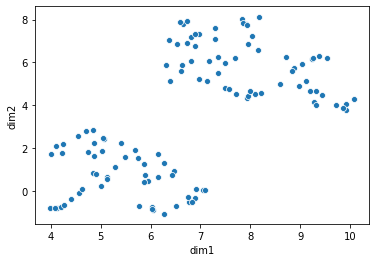

In [122]:
reducer = umap.UMAP(n_components = 2, n_neighbors = 5, metric = 'braycurtis', random_state = 0, min_dist = 0.1)
embeddings = reducer.fit_transform(cyto_table)
plot_samples = pd.DataFrame(data = embeddings, columns = ['dim1', 'dim2'], index = cyto_table.index)

# Unlabeled UMAP
sns.scatterplot(x = 'dim1', y = 'dim2', data = plot_samples)

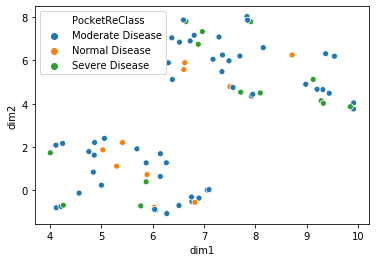

In [123]:
plot_samples = pd.concat([plot_samples, cyto_map_table['PocketReClass']], axis = 1, sort=False)

# Labeled UMAP
sns.scatterplot(x = 'dim1', y = 'dim2', hue = 'PocketReClass', data = plot_samples)